In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Added this line to import pandas
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

data_train = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\archive (20)\\sign_mnist_train.csv", encoding='latin-1')
data_test = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\archive (20)\\sign_mnist_test.csv", encoding='latin-1')

In [3]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [11]:

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build the Neural Network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
422/422 [==============================] - 6s 13ms/step - loss: 0.2836 - accuracy: 0.9141 - val_loss: 0.1213 - val_accuracy: 0.9633
Epoch 2/10
422/422 [==============================] - 6s 14ms/step - loss: 0.1150 - accuracy: 0.9647 - val_loss: 0.0779 - val_accuracy: 0.9743
Epoch 3/10
422/422 [==============================] - 5s 13ms/step - loss: 0.0781 - accuracy: 0.9749 - val_loss: 0.0744 - val_accuracy: 0.9767
Epoch 4/10
422/422 [==============================] - 6s 13ms/step - loss: 0.0626 - accuracy: 0.9802 - val_loss: 0.0656 - val_accuracy: 0.9813
Epoch 5/10
422/422 [==============================] - 5s 12ms/step - loss: 0.0484 - accuracy: 0.9844 - val_loss: 0.0632 - val_accuracy: 0.9825
Epoch 6/10
422/422 [==============================] - 5s 12ms/step - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.0607 - val_accuracy: 0.9837
Epoch 7/10
422/422 [==============================] - 6s 13ms/step - loss: 0.0352 - accuracy: 0.9884 - val_loss: 0.0612 - val_accuracy: 0.9833

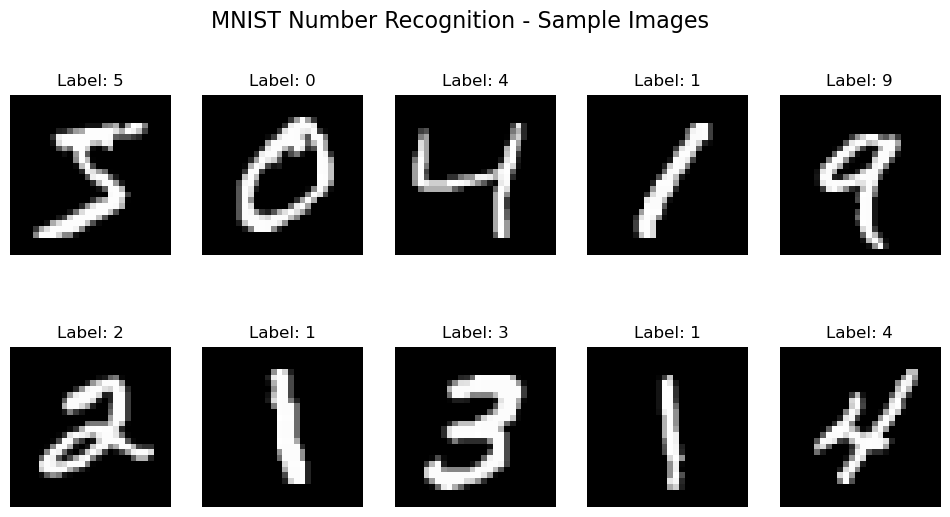

In [12]:
from tensorflow.keras.datasets import mnist
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Plot the first 10 images from the training dataset
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("MNIST Number Recognition - Sample Images", fontsize=16)
plt.show()

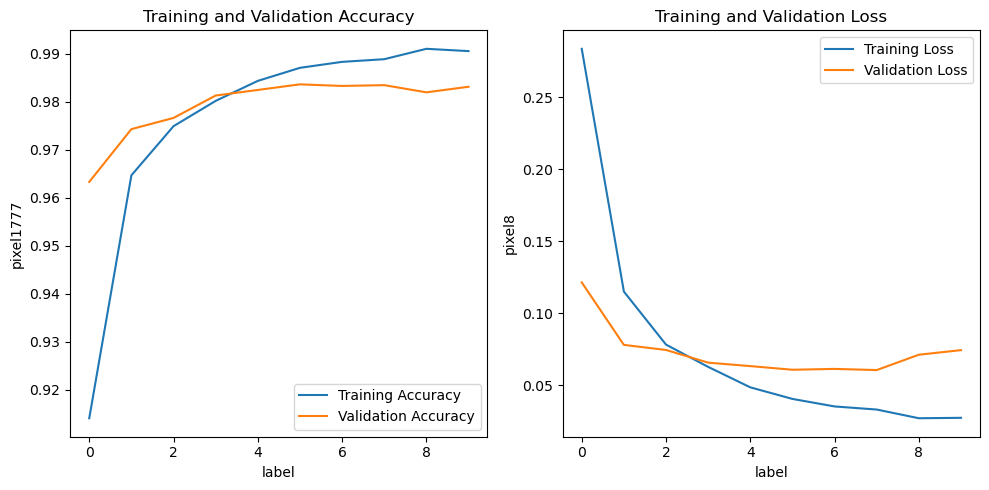

In [15]:

# Plot the training accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('label')
plt.ylabel('pixel1777')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('label')
plt.ylabel('pixel8')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()